<a href="https://colab.research.google.com/github/LazaroR-u/GSoC_QMLHEP_2024/blob/main/tasks/task_1_GSoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSoC 2024 ML4SCI QML-HEP Tasks


**Diaz Lievano Lazaro Raul**


## Task I: Quantum Computing Part

1) implement a simple quantum operation with Cirq or Pennylane

    a. With 5 qubits

    b. Apply Hadamard operation on every qubit

    c. Apply CNOT operation on (0, 1), (1, 2), (2, 3), (3, 4)

    d. Rotate X with pi/2 on any qubit

    e. SWAP (0, 4)

    f. Plot the circuit



2) Implement a second circuit with a framework of your choice:

    a. Apply a Hadamard gate to the first qubit.

    b. Rotate the second qubit by pi/3 around X.

    c. Apply a Hadamard gate to the third and fourth qubit.

    d. Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>.

  


# Subtask 1

## Implementation with CIRQ

In [1]:
%%capture
pip install cirq

In [2]:
import cirq
import math
import matplotlib.pyplot as plt

In [35]:
# Define the 5 qubits
qubits = cirq.LineQubit.range(5)

# Define the circuit
circuit1 = cirq.Circuit(
    # Hadamard on every qubit
    cirq.H.on_each(*qubits),

    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    cirq.CNOT(qubits[0], qubits[1]),
    cirq.CNOT(qubits[1], qubits[2]),
    cirq.CNOT(qubits[2], qubits[3]),
    cirq.CNOT(qubits[3], qubits[4]),

    # Rotate the last qubit by pi/2 around X
    cirq.rx(math.pi / 2).on(qubits[4]),

    # SWAP (0, 4)
    cirq.SWAP(qubits[0], qubits[4]),


    cirq.measure_each(qubits)
)

# Plot the circuit
print(circuit1)

0: ───H───@──────────────────────────×───M───
          │                          │
1: ───H───X───@───M──────────────────┼───────
              │                      │
2: ───H───────X───@───M──────────────┼───────
                  │                  │
3: ───H───────────X───@───M──────────┼───────
                      │              │
4: ───H───────────────X───Rx(0.5π)───×───M───


In [41]:
simulator = cirq.Simulator()
reps = 1_000_000
result = simulator.run(circuit1, repetitions=reps).data
#dict(result.iloc[:,0].value_counts()/reps)

for i in range(len(qubits)):
  print(f"qubit {i}: {dict(result.iloc[:,i].value_counts()/reps)}")

qubit 0: {1: 0.500286, 0: 0.499714}
qubit 1: {1: 0.500009, 0: 0.499991}
qubit 2: {0: 0.500897, 1: 0.499103}
qubit 3: {0: 0.500113, 1: 0.499887}
qubit 4: {0: 0.500291, 1: 0.499709}


## Implementation with Pennylane

In [5]:
%%capture
pip install pennylane

In [6]:
import pennylane as qml
from pennylane import numpy as np

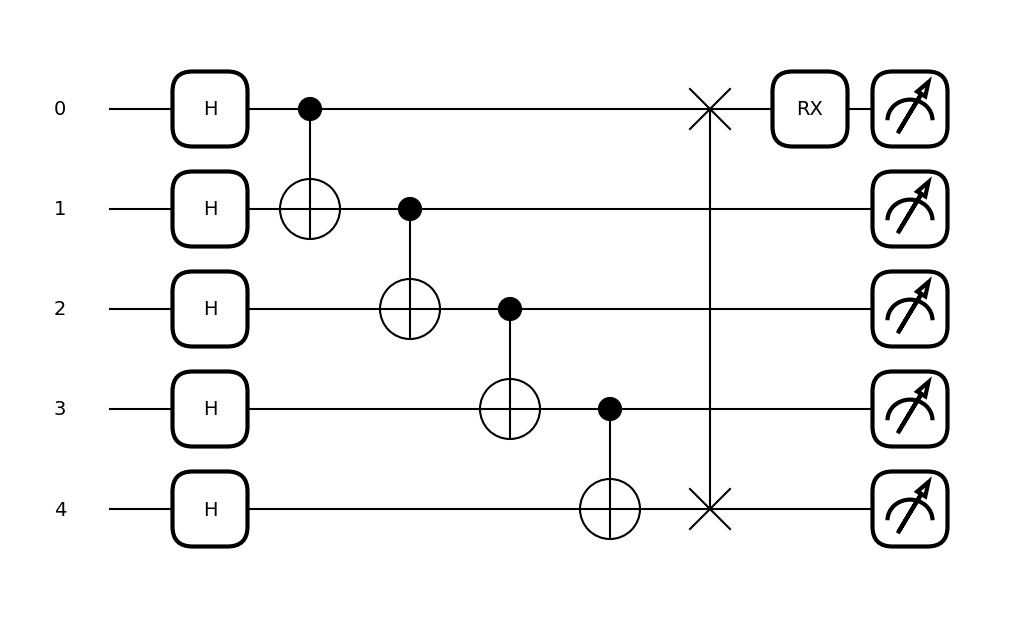

In [26]:
# Define the device and number of wires
n = 5
dev = qml.device("default.qubit", wires=5)

# Define the circuit
@qml.qnode(dev)
def circuit1(theta):
    # Hadamard on every qubit
    for i in range(len(dev.wires)):
        qml.Hadamard(wires=i)
    # CNOT on (0, 1), (1, 2), (2, 3), (3, 4)
    for i in range(n-1):
        qml.CNOT((i,i+1))

    # SWAP (0, 4)
    qml.SWAP((0,4))

    # Rotate the last qubit by pi/2 around X
    qml.RX(theta, 0)

    return qml.probs(wires = range(n))


qml.draw_mpl(circuit1)(np.pi/2);

In [27]:
circuit1(np.pi/2)

tensor([0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
        0.03125, 0.03125, 0.03125, 0.03125], requires_grad=True)

# Subtask 2

## Implementation with Cirq

In [33]:
qubits2 = cirq.LineQubit.range(5)

circuit2 = cirq.Circuit(
    # Hadamard on first qubit
    cirq.H(qubits2[0]),

    # Rotate the second qubit by pi/3 around X
    cirq.rx(math.pi / 3).on(qubits2[1]),

    #apply hadamart gate to the third and fourth qubit
    cirq.H(qubits2[2]),
    cirq.H(qubits2[3]),


    # SWAP test (0, 1), (2,3)
    cirq.H(qubits[4]),
    cirq.CSWAP(qubits[4], qubits2[0], qubits2[1]),
    cirq.CSWAP(qubits[4], qubits2[2], qubits2[3]),
    cirq.H(qubits[4]),
    cirq.measure(qubits[4])
)
# Plot the circuit
print(circuit2)


0: ───H────────────×───────────────
                   │
1: ───Rx(0.333π)───×───────────────
                   │
2: ───H────────────┼───×───────────
                   │   │
3: ───H────────────┼───×───────────
                   │   │
4: ───H────────────@───@───H───M───


In [42]:
simulator = cirq.Simulator()
reps = 1_000_000
result = simulator.run(circuit2, repetitions=reps).data
dict(result.iloc[:,0].value_counts()/reps)

{0: 0.750005, 1: 0.249995}

## Implementation with Pennylane

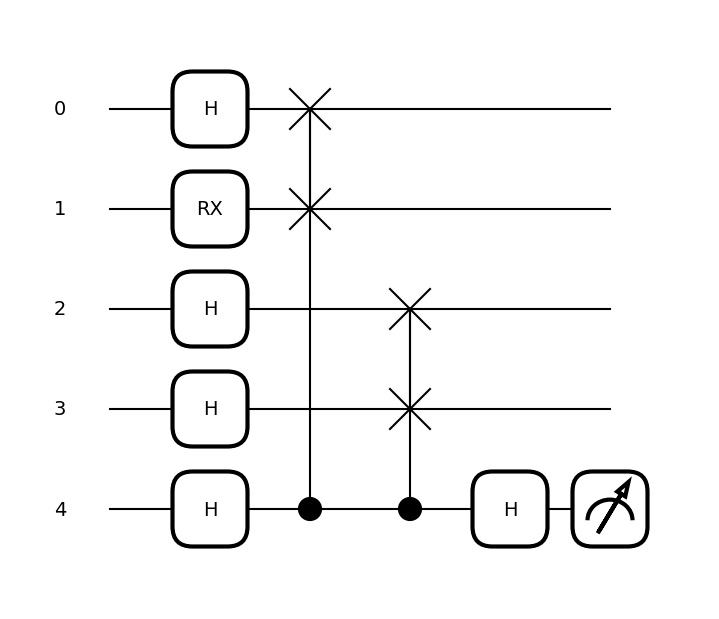

In [55]:
# Define a device
dev = qml.device('default.qubit', wires = 5)

# construct the qnode
# The circuit measures the probablities on last qubit
@qml.qnode(dev)
def circuit(theta):
    qml.Hadamard(0)
    qml.RX(theta, 1)
    qml.Hadamard(2)
    qml.Hadamard(3)

    # SWAP Test
    qml.Hadamard(4)
    qml.CSWAP((4,0,1))
    qml.CSWAP((4,2,3))
    qml.Hadamard(4)

    return qml.probs(wires = 4)

qml.draw_mpl(circuit)(np.pi/3);

This value is constant indenpendently of the value of theta.  

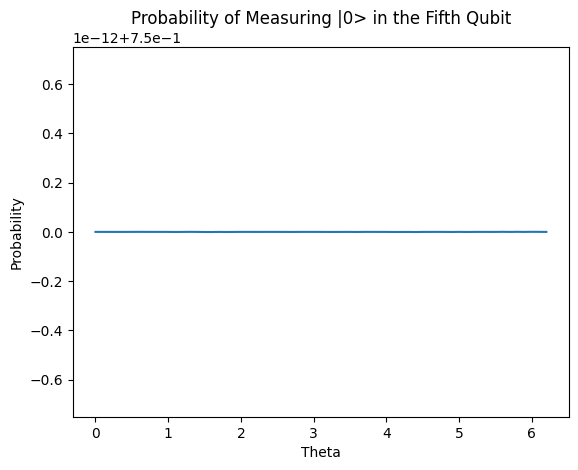

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Define thetas from 0 to 2*pi
thetas = np.arange(0, 2*np.pi, 0.1)

# Calculate the probabilities
prob_0s = [circuit(theta)[0] for theta in thetas]

# Plot
plt.plot(thetas, prob_0s)
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.title('Probability of Measuring |0> in the Fifth Qubit')
plt.show()